# Popular and Most Desired Programming Languages

Now let's look at the first question of interest.  That is - What were the most popular programming languages over the past 5 years?

In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

df_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_public.csv')
df_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_public.csv')
df_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_public.csv')
df_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_public.csv')
df_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_public.csv')
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [117]:
# import schemas for each year
# schema_2019 = pd.read_csv('.\data\stack-overflow-developer-survey-2019\survey_results_schema.csv')
# schema_2020 = pd.read_csv('.\data\stack-overflow-developer-survey-2020\survey_results_schema.csv')
# schema_2021 = pd.read_csv('.\data\stack-overflow-developer-survey-2021\survey_results_schema.csv')
# schema_2022 = pd.read_csv('.\data\stack-overflow-developer-survey-2022\survey_results_schema.csv')
# schema_2023 = pd.read_csv('.\data\stack-overflow-developer-survey-2023\survey_results_schema.csv')

# for q in range(1,schema_2023.shape[0]):
#     print(str(q) + " " + schema_2023['qname'][q] + "/n"+ schema_2023['question'][q])

# schema_2023.head()

df_2020.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [102]:
developers = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']
developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]

66933

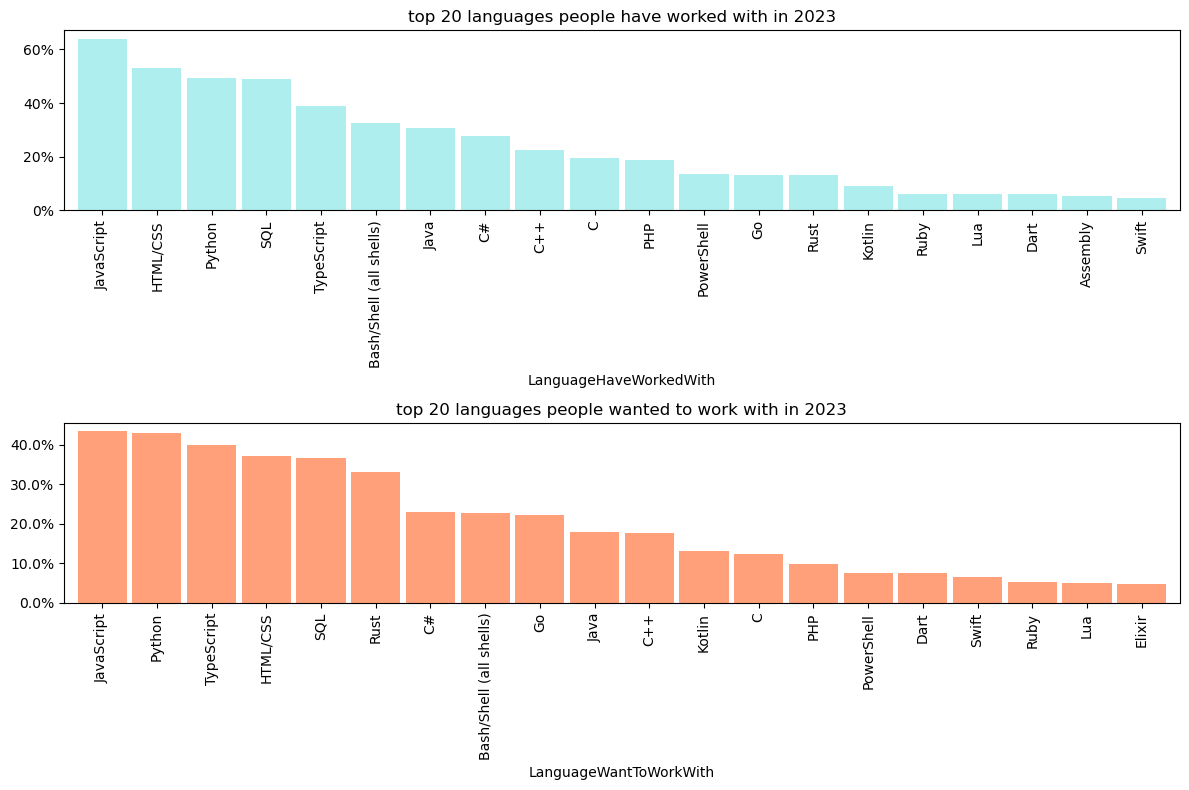

top 5 languages used percentages
LanguageHaveWorkedWith
JavaScript    63.932752
HTML/CSS      53.243057
Python        49.527198
SQL           48.913243
TypeScript    39.064723
Name: count, dtype: float64
top 5 languages wanted percentages
LanguageWantToWorkWith
JavaScript    43.348325
Python        43.012551
TypeScript    39.965803
HTML/CSS      37.081366
SQL           36.672490
Name: count, dtype: float64


In [138]:
# In this case, we want to look at the languages data for each year
# First - let's just look at the top 10 languages people have worked with  and want to work with in 2023

# drop nas split into list and explode into rows
language_count_23 = df_2023.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_count_23 = language_count_23.value_counts()

# bar chart
fig, (ax1, ax2) =  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_23[0:20] * 100 / df_2023.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='paleturquoise', width=0.9, ax=ax1);
ax1.set_title("top 20 languages people have worked with in 2023")
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_23 = df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
# count values
language_want_count_23 = language_want_count_23.value_counts()

# bar chart
(language_want_count_23[0:20] * 100 / df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='lightsalmon', width=0.9, ax=ax2);
ax2.set_title("top 20 languages people wanted to work with in 2023")
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

# print exact percentages
print("top 5 languages used percentages")
print(language_count_23[0:5] * 100 / df_2023.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0])

print("top 5 languages wanted percentages")
print(language_want_count_23[0:5] * 100 / df_2023.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0])


Here we can see that the top 5 languages worked with for 2023 were Javascript 63.9%, HTML/CSS 53.2%, Python 49.5%, SQL 48.9%, TypeScript 39%, the same top languages can be seen within the top languages people wanted to work with with some minor reordering. However this is for the overall participants, but we are interested in professional developers, so lets look at those.

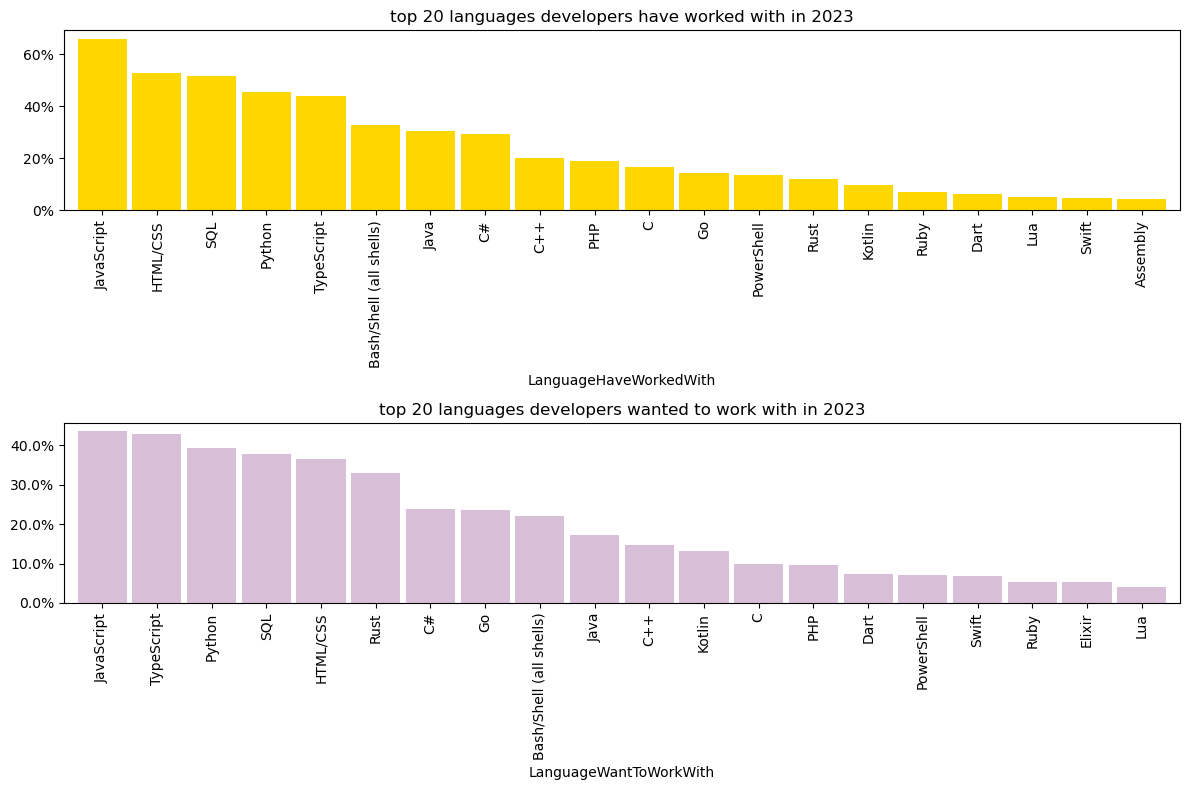

top 5 languages used devs percentages
LanguageHaveWorkedWith
JavaScript    65.940567
HTML/CSS      52.927554
SQL           51.608325
Python        45.400625
TypeScript    43.825915
Name: count, dtype: float64
top 5 languages wanted devs percentages
LanguageWantToWorkWith
JavaScript    43.576148
TypeScript    42.818695
Python        39.276390
SQL           37.835616
HTML/CSS      36.597905
Name: count, dtype: float64


In [139]:
#create developer only dataframe
developers = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_count_dev_23 = language_count_dev_23.value_counts()

# bar chart
fig, (ax3, ax4) =  plt.subplots(2, 1, sharex=False, sharey= False, figsize=(12,8)) 
(language_count_dev_23[0:20] * 100 / developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax3);
ax3.set_title("top 20 languages developers have worked with in 2023")
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_dev_23 = developers.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
# count values
language_want_count_dev_23 = language_want_count_dev_23.value_counts()

# bar chart
(language_want_count_dev_23[0:20] * 100 / developers.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax4);
ax4.set_title("top 20 languages developers wanted to work with in 2023")
ax4.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

# print exact percentages
print("top 5 languages used devs percentages")
print(language_count_dev_23[0:5] * 100 / developers.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0])

print("top 5 languages wanted devs percentages")
print(language_want_count_dev_23[0:5] * 100 / developers.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0])

Here we can see that the top 5 languages worked with by developers for 2023 were Javascript 65.9%, HTML/CSS 52.9%, SQL 51.6%, Python 45.4%, TypeScript 43.8%, the same top languages can be seen within the top languages people wanted to work with with some minor reordering the same as with the full set of participants. Comparing these results with the full set of participants we can see that SQL has gone up and Python has gone down in the useage ordering and Typescript has gone up and Python dropped down in those that developers want to work with.

In order to answer the full question we need to find the percentages for each languages that were chosen over the past 5 years.

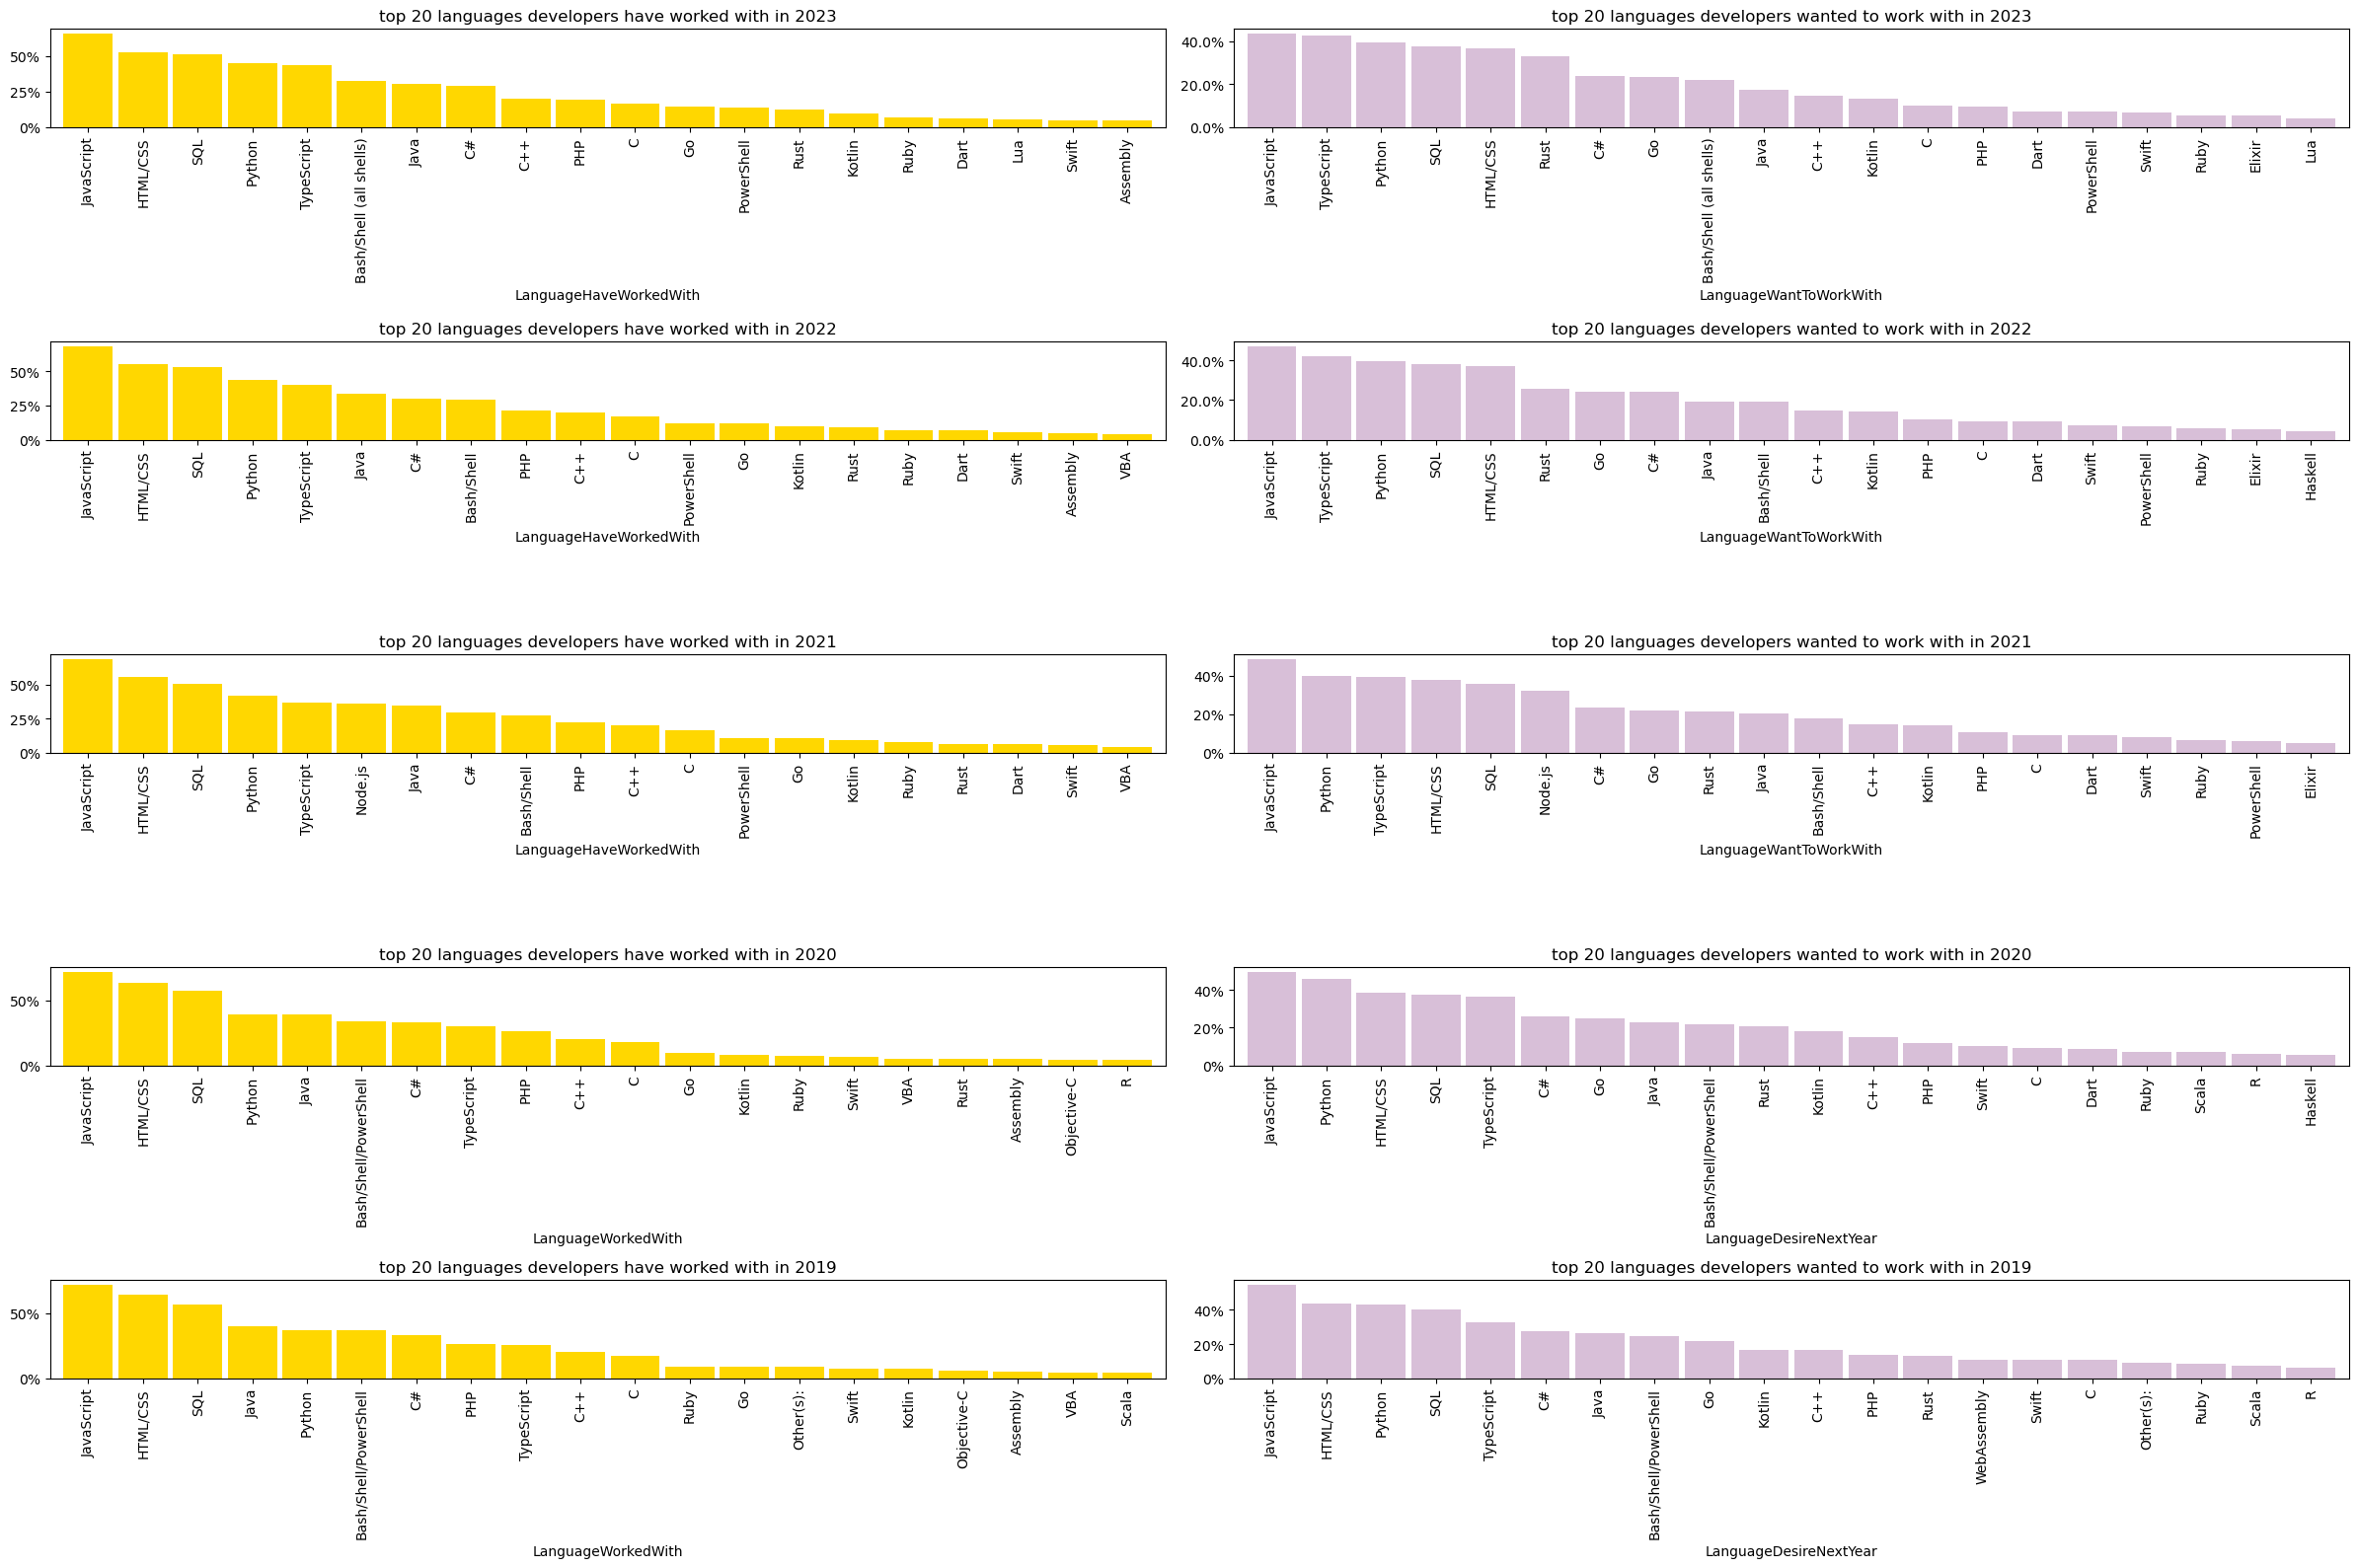

In [148]:
#create developer only dataframe
developers_23 = df_2023.loc[df_2023['MainBranch'] == 'I am a developer by profession']
developers_22 = df_2022.loc[df_2022['MainBranch'] == 'I am a developer by profession']
developers_21 = df_2021.loc[df_2021['MainBranch'] == 'I am a developer by profession']
developers_20 = df_2020.loc[df_2020['MainBranch'] == 'I am a developer by profession']
developers_19 = df_2019.loc[df_2019['MainBranch'] == 'I am a developer by profession']

# drop nas split into list and explode into rows
language_count_dev_23 = developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
language_count_dev_22 = developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
language_count_dev_21 = developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
language_count_dev_20 = developers_20.LanguageWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
language_count_dev_19 = developers_19.LanguageWorkedWith.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_count_dev_23 = language_count_dev_23.value_counts()
language_count_dev_22 = language_count_dev_22.value_counts()
language_count_dev_21 = language_count_dev_21.value_counts()
language_count_dev_20 = language_count_dev_20.value_counts()
language_count_dev_19 = language_count_dev_19.value_counts()

# bar chart
fig, ((ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) =  plt.subplots(5, 2, sharex=False, sharey= False, figsize=(24,16))

# bar chart 1
(language_count_dev_23[0:20] * 100 / developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax5);
ax5.set_title("top 20 languages developers have worked with in 2023")
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 3
(language_count_dev_22[0:20] * 100 / developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax7);
ax7.set_title("top 20 languages developers have worked with in 2022")
ax7.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 5
(language_count_dev_21[0:20] * 100 / developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax9);
ax9.set_title("top 20 languages developers have worked with in 2021")
ax9.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 7
(language_count_dev_20[0:20] * 100 / developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax11);
ax11.set_title("top 20 languages developers have worked with in 2020")
ax11.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 9
(language_count_dev_19[0:20] * 100 / developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='gold', width=0.9, ax=ax13);
ax13.set_title("top 20 languages developers have worked with in 2019")
ax13.yaxis.set_major_formatter(mtick.PercentFormatter())

# drop nas split into list and explode into rows
language_want_count_dev_23 = developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_22 = developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_21 = developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_20 = developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
language_want_count_dev_19 = developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').str.split(';').explode()
#count values
language_want_count_dev_23 = language_want_count_dev_23.value_counts()
language_want_count_dev_22 = language_want_count_dev_22.value_counts()
language_want_count_dev_21 = language_want_count_dev_21.value_counts()
language_want_count_dev_20 = language_want_count_dev_20.value_counts()
language_want_count_dev_19 = language_want_count_dev_19.value_counts()

# bar chart 2
(language_want_count_dev_23[0:20] * 100 / developers_23.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax6);
ax6.set_title("top 20 languages developers wanted to work with in 2023")
ax6.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 4
(language_want_count_dev_22[0:20] * 100 / developers_22.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax8);
ax8.set_title("top 20 languages developers wanted to work with in 2022")
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 6
(language_want_count_dev_21[0:20] * 100 / developers_21.LanguageWantToWorkWith.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax10);
ax10.set_title("top 20 languages developers wanted to work with in 2021")
ax10.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 8
(language_want_count_dev_20[0:20] * 100 / developers_20.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax12);
ax12.set_title("top 20 languages developers wanted to work with in 2020")
ax12.yaxis.set_major_formatter(mtick.PercentFormatter())

# bar chart 2
(language_want_count_dev_19[0:20] * 100 / developers_19.LanguageDesireNextYear.dropna(axis=0, how='any').shape[0]).plot.bar(color='thistle', width=0.9, ax=ax14);
ax14.set_title("top 20 languages developers wanted to work with in 2019")
ax14.yaxis.set_major_formatter(mtick.PercentFormatter())

# display plots
plt.tight_layout()
plt.show()

As we can see above the popularity of the top programming languages remain mostly the same with some fluctuations, however the bar charts are not the easiest way to observe these fluctuations so lets look at the changes over time as a lineplot.

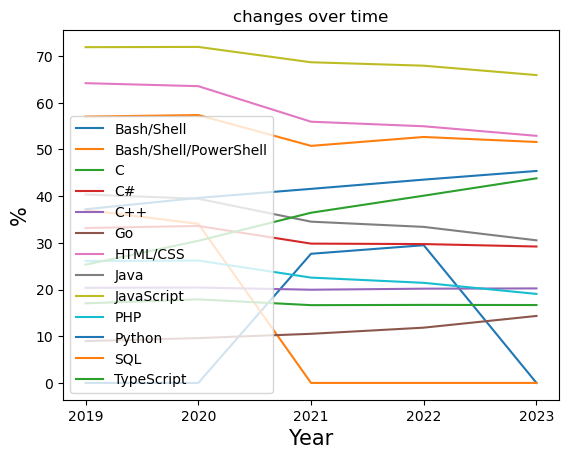

Index(['APL', 'Ada', 'Apex', 'Assembly', 'Bash/Shell',
       'Bash/Shell (all shells)', 'Bash/Shell/PowerShell', 'C', 'C#', 'C++',
       'COBOL', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 'Elixir',
       'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy',
       'HTML/CSS', 'Haskell', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'LISP',
       'Lisp', 'Lua', 'MATLAB', 'Matlab', 'Nim', 'Node.js', 'OCaml',
       'Objective-C', 'Other(s):', 'PHP', 'Perl', 'PowerShell', 'Prolog',
       'Python', 'R', 'Raku', 'Ruby', 'Rust', 'SAS', 'SQL', 'Scala',
       'Solidity', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)',
       'WebAssembly', 'Zig'],
      dtype='object')

In [181]:
# language_count_dev_23 = language_count_dev_23.value_counts()
# language_count_dev_22 = language_count_dev_22.value_counts()
# language_count_dev_21 = language_count_dev_21.value_counts()
# language_count_dev_20 = language_count_dev_20.value_counts()
# language_count_dev_19 = language_count_dev_19.value_counts()

# Creating a dictionary by passing Series objects as values
frame = {'2019': language_count_dev_19 * 100/ developers_19.LanguageWorkedWith.dropna(axis=0, how='any').shape[0],
         '2020': language_count_dev_20 * 100/ developers_20.LanguageWorkedWith.dropna(axis=0, how='any').shape[0],
         '2021': language_count_dev_21 * 100/ developers_21.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0],
         '2022': language_count_dev_22 * 100/ developers_22.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0],
         '2023': language_count_dev_23 * 100/ developers_23.LanguageHaveWorkedWith.dropna(axis=0, how='any').shape[0]}
 
# Creating DataFrame by passing Dictionary
result = pd.DataFrame(frame).fillna(0)
 
# Printing elements of Dataframe
for i, row in enumerate(result.index):
    if (result.iloc[i].sum() > 50):
        plt.plot(result.columns, result.iloc[i], label=row)


plt.xlabel('Year', fontsize=15)
plt.ylabel('%', fontsize=15)
plt.legend(loc="lower left")
plt.title('changes over time')

plt.show()

result.index